In [1]:
from src.values import *
from src.utils import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%load_ext autoreload
%autoreload 2


In [2]:
calculated_values = np.load("./Results/Exp_vals.npy")
print(calculated_values.shape)

(3, 3, 200, 4, 2)


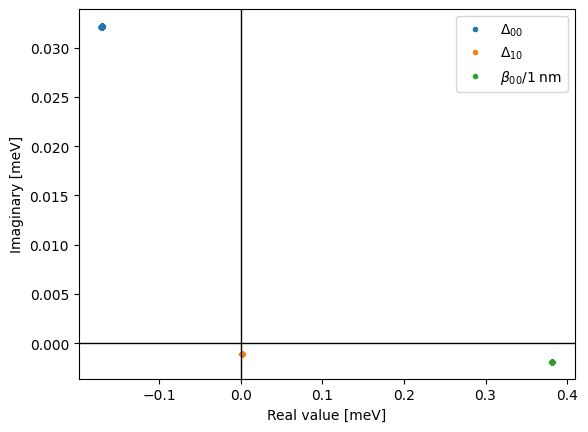

In [3]:
labels=[r'$\Delta_{00}$',r'$\Delta_{10}$',r'$\beta_{00}/1\;$'+'nm']
# colors = ['r', 'g', 'b']
def plot_complex(r, theta, label): 
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.plot(x, y, '.', label = label)
    # plt.arrow(0, 0, x.mean()-0.01, y.mean()-0.01, head_width=0.01, head_length=0.01,  fc='black', ec=color)

for i in range(3):
    r = calculated_values[0, 0, :, i, 0]
    theta = calculated_values[0, 0,  :, i, 1]
    plot_complex(r, theta, labels[i])

plt.axhline(0, color='black', linewidth=1)  # X-axis at y=0
plt.axvline(0, color='black', linewidth=1)  # Y-axis at x=0

plt.xlabel('Real value [meV]')
plt.ylabel('Imaginary [meV]')
plt.legend()
plt.show()

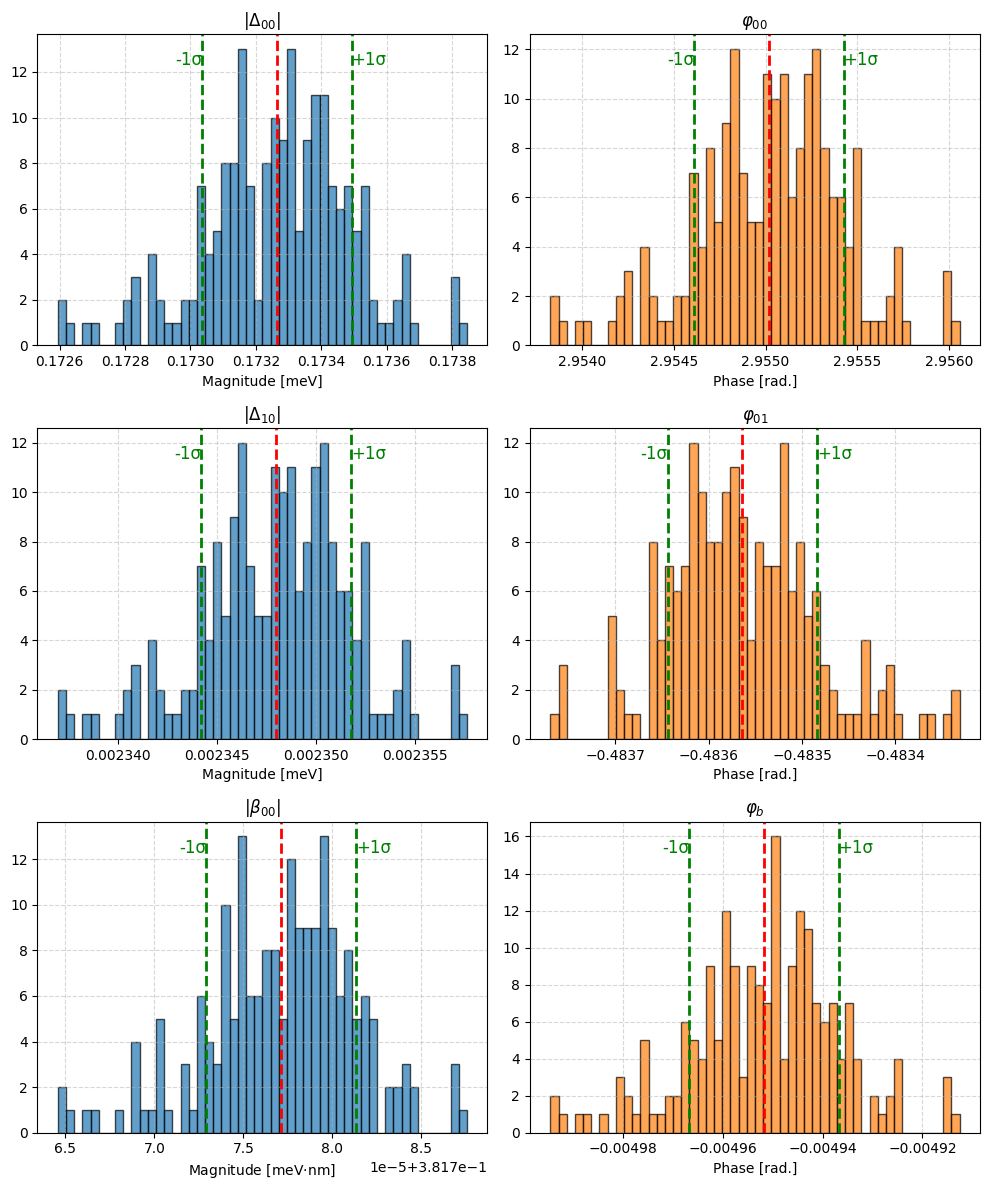

In [4]:
num_bins = 50  # Number of histogram bins

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12)) 


label_abs = [r'$|\Delta_{00}|$',r'$|\Delta_{10}|$',r'$|\beta_{00}|$']
label_angle = [r'$\varphi_{00}$',r'$\varphi_{01}$',r'$\varphi_{b}$']

for i in range(3):
    # Left column: Histogram of length
    axes[i, 0].hist(calculated_values[0,0, :, i, 0], bins=num_bins, color='tab:blue', alpha=0.7, edgecolor='black')
    axes[i, 0].set_title(label_abs[i])
    axes[i, 0].set_xlabel("Magnitude [meV]")
    if i==2: 
        axes[i, 0].set_xlabel("Magnitude [meV"+r'$\cdot$'+"nm]")
    # axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].grid(True, linestyle="--", alpha=0.5)
    
    
    # Plot mean and standard deviation lines
    ax = axes[i, 0]
    mean = np.mean(calculated_values[0, 0,:, i, 0])
    std_dev = np.std(calculated_values[0,0, :, i, 0])

    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label="Mean (μ)")
    ax.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2)
    ax.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2)

    # Annotate standard deviation
    ax.text(mean - std_dev, ax.get_ylim()[1] * 0.9, "-1σ", color='green', fontsize=12, ha='right')
    ax.text(mean + std_dev, ax.get_ylim()[1] * 0.9, "+1σ", color='green', fontsize=12, ha='left')
    # ax.text(mean + std_dev, ax.get_ylim()[1] * 0.9, "+1σ"+f' = {std_dev:.5f}', color='green', fontsize=12, ha='left')


    # Right column: Histogram of phase
    axes[i, 1].hist(calculated_values[0, 0,:, i, 1], bins=num_bins, color='tab:orange', alpha=0.7, edgecolor='black')
    axes[i, 1].set_title(label_angle[i])
    axes[i, 1].set_xlabel("Phase [rad.]")
    # axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].grid(True, linestyle="--", alpha=0.5)
        
    # Plot mean and standard deviation lines
    ax = axes[i, 1]
    mean = np.mean(calculated_values[0, 0,:, i, 1])
    std_dev = np.std(calculated_values[0, 0,:, i, 1])

    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label="Mean (μ)")
    ax.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2)
    ax.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2)

    # Annotate standard deviation
    ax.text(mean - std_dev, ax.get_ylim()[1] * 0.9, "-1σ", color='green', fontsize=12, ha='right')
    ax.text(mean + std_dev, ax.get_ylim()[1] * 0.9, "+1σ", color='green', fontsize=12, ha='left')
    # ax.text(mean + std_dev, ax.get_ylim()[1] * 0.9, "+1σ"+f' = {std_dev:.5f}', color='green', fontsize=12, ha='left')


# Adjust layout
plt.tight_layout()

plt.show()


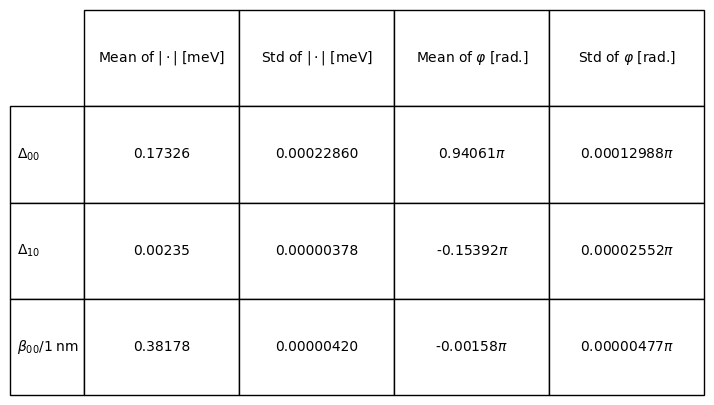

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis("off") 

table_abs_data = [[f"{np.mean(calculated_values[0,0, :, i, 0]):.5f}", f"{np.std(calculated_values[0, 0,:, i, 0]):.8f}",f"{np.mean(calculated_values[0,0, :, i, 1])/np.pi:.5f}"+r'$\pi$', f"{np.std(calculated_values[0, 0,:, i, 1])/np.pi:.8f}"+r'$\pi$']for i in range(3)]

column_labels = ["Mean of "+r'$| \cdot |$'+" [meV]", "Std of "+r'$| \cdot |$'+" [meV]", 'Mean of '+r'$\varphi$'+' [rad.]', 'Std of '+r'$\varphi$'+' [rad.]']

table_abs = plt.table(cellText=table_abs_data, colLabels=column_labels, rowLabels=labels,
                  cellLoc='center', loc='bottom', bbox=[0, 0, 1, 1])

plt.show()

In [6]:
sample_size = np.shape(calculated_values)[2]
N_t = np.shape(calculated_values)[0]
Omega_0 = np.zeros((N_t**2, sample_size))
Omega_total = np.zeros((N_t**2, sample_size))

for i in range(N_t**2):    
    for j in range(sample_size):
        Delta_0000 = [calculated_values[i % N_t, i // N_t, j, 0, 0], calculated_values[i % N_t, i // N_t, j, 0, 1]] 
        Delta_1000 = [ calculated_values[i % N_t, i // N_t, j, 1, 0], calculated_values[i % N_t, i // N_t, j, 1, 1] ] 
        beta = [calculated_values[i % N_t, i // N_t, j, 2, 0], calculated_values[i % N_t, i // N_t, j, 2, 1]]
        Omega_0[i, j]+=calculate_Rabi_freq(Delta_0000, Delta_1000, beta, mode = 'simple')/10**9/B
        Omega_total[i, j]+=calculate_Rabi_freq(Delta_0000, Delta_1000, beta, mode = 'simple_dipole')/10**9/B
        


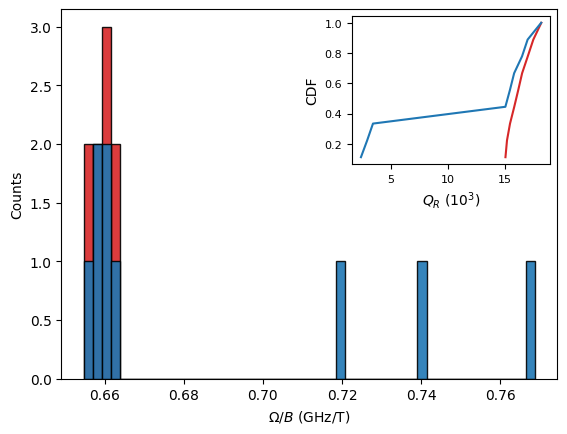

In [ ]:

fig, ax = plt.subplots()
Omega_0 = np.abs(Omega_0) 
Omega_total = np.abs(Omega_total)

bins = np.histogram_bin_edges(Omega_total.flatten(), bins=50)

ax.hist((Omega_0.mean(axis = 1)), color = 'tab:red', bins = bins, edgecolor = 'black', alpha = 0.9)
ax.hist((Omega_total.mean(axis =1)), color = 'tab:blue', bins = bins, edgecolor = 'black', alpha = 0.9)

ax.set_ylabel("Counts")
ax.set_xlabel(r'$\Omega/B$'+" (GHz/T)")

T2_0 = np.sqrt(2) / (Omega_0.std(axis =1))
T2_dipole= np.sqrt(2) / (Omega_total.std(axis = 1))

# T2_dipole = 10**5 # temp 
QR_0 = Omega_0.mean(axis = 1)*T2_0/10**3
QR_dipole = Omega_total.mean(axis =1)*T2_dipole/10**3
QR_0.sort()
QR_dipole.sort()


ax_inset = inset_axes(ax, width="40%", height="40%", loc="upper right")
cdf_dipole = np.arange( 1, 1+ len(QR_dipole)) / len(QR_dipole)
cdf_0 = np.arange(1, 1+ len(QR_0)) / len(QR_0)

ax_inset.plot(QR_0, cdf_0, color='tab:red', linewidth=1.5)
ax_inset.plot(QR_dipole, cdf_dipole, color='tab:blue', linewidth=1.5)

# # Format inset
# ax_inset.set_xlim([-0.1, 15])
# ax_inset.set_ylim([0, 1.05])
ax_inset.set_xlabel(r"$Q_R$ ($10^3$)", fontsize=10)
ax_inset.set_ylabel("CDF", fontsize=10)
ax_inset.tick_params(labelsize=8)
# ax_inset.legend(fontsize=8)


